<a href="https://colab.research.google.com/github/LazyHooks/models_aon/blob/main/market%20leader_attr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [ ]:

from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


load data

In [ ]:
dataset = pd.read_csv('Market Leader_attr.csv')

split

In [ ]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

split

In [ ]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

fit

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

print the model

In [ ]:
print(model.feature_importances_)

[0.12110345 0.22758678 0.         0.10095297 0.17205027 0.09274498
 0.28556156]


feature importance & weights

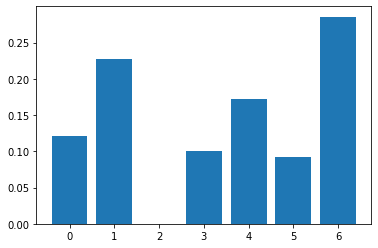

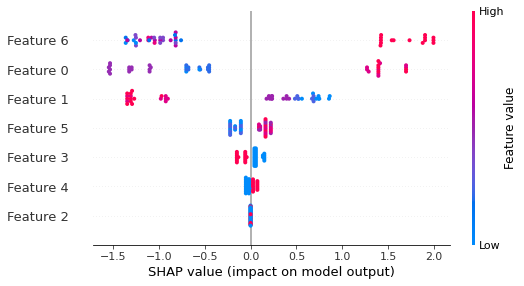

In [ ]:
from matplotlib import pyplot
from xgboost import plot_importance
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)
#0-Pay Positioning Score
#1-Pay Range Score	
#2-Internal focus
#3-Balanced	
#4-External	
#5-Pay Mix Score	
#6-Pay Differentiation Score	



predict

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

evaluate predictions

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.33%


predict 1

In [ ]:
#singlepred = model.predict([[]])
#singleprediction = [round(value) for value in y_pred]
#print(singleprediction)

visualise single

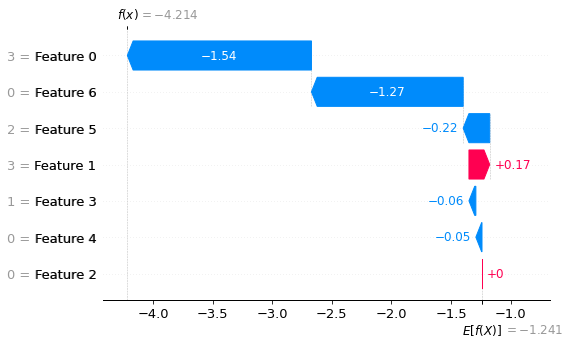

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[2])